# PHY206: General Physics for the Life Sciences II

## Tucker Knaak - Department of Physics, Creighton University - Spring 2024

#### In Lab 4, the students investigate the passive transport of electric signals throughout axons and cell membranes.  The students use resistors of $\text{R}_{\text{mem}}=220\Omega$ for the cell membrane and of $\text{R}_{\text{axon}}=100\Omega$ for the axon.  The students then measure the voltage difference for the seven resistors representing the cell membrane and show the exponential decay of the electric signal along the path traveled.  The students then create a plot of the voltage differences and find the best-fit length constant for the exponential decay.  In this code, we set the measured data and error and use scipy.odr to create curvefits for the measured data.  We then create a plot and report the best-fit length constant for the study.

#### This cell provides the libraries and functions required to conduct this study.

In [1]:
'''Required Libraries'''
import matplotlib.pyplot as plt
import numpy as np

'''Required Functions'''
from scipy.odr import ODR, Model, Data, RealData

#### This cell sets the measured voltage difference data as well as the reported errors in the measurements.  A non-linear ODR curvefit is then conducted to find the best fit voltage stimulus and length constant.

In [2]:
'''Given lengths and measured voltage differences'''
x_meas = [0, 1, 2, 3, 4, 5, 6, 7]
x_err = [0.001 for x in x_meas]
V_meas = [6.4, 3.4, 2.0, 1.0, 0.35, 0.15, 0.05, 0.01]
V_err = [0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1]

'''Function for x vs V curvefit'''
def signal(params: list, x: float):
    V = params[0] * np.exp(-x / params[1])
    return V

'''Measured ODR Curvefit'''
data_meas = RealData(x_meas, V_meas, x_err, V_err)
model_meas = Model(signal)
pguess_meas = [6.4, 0.5]
odr_meas = ODR(data_meas, model_meas, pguess_meas)
output_meas = odr_meas.run()
V0_meas, V0_err = output_meas.beta[0], output_meas.sd_beta[0] / np.sqrt(len(x_meas))
lambda_meas, lambda_err = output_meas.beta[1], output_meas.sd_beta[1] / np.sqrt(len(x_meas))
print(f'Best fit voltage stimulus: V0 = {V0_meas:.2f} \u00B1 {V0_err:.2f}V')
print(f'Best fit length constant: \u03BB = {lambda_meas:.2f} \u00B1 {lambda_err:.2f}mm')

'''Range for measured curvefit data'''
x_range = np.linspace(0, 7, 100)

Best fit voltage stimulus: V0 = 6.46 ± 0.07V
Best fit length constant: λ = 1.54 ± 0.02mm


#### This cell creates the plot for the results of the study.

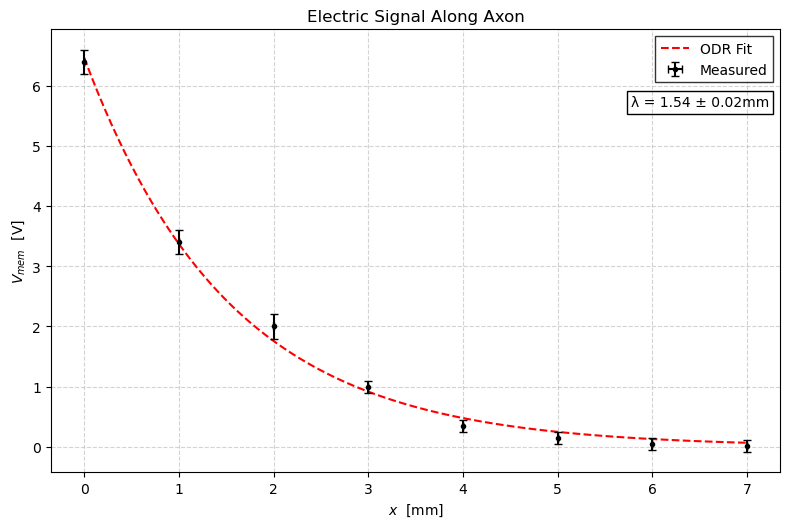

In [3]:
'''Create figure and plot results'''
fig, ax = plt.subplots(1, 1, figsize = (8, 5))
fig.tight_layout(pad = 1)
ax.set_xlabel('$x$  [mm]')
ax.set_ylabel('$V_{mem}$  [V]')
ax.set_title('Electric Signal Along Axon')
ax.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.5)
ax.plot(x_range, signal(output_meas.beta, x_range), linestyle = 'dashed', color = 'red', label = 'ODR Fit')
ax.errorbar(x_meas, V_meas, xerr = x_err, yerr = V_err, capsize = 3, fmt = 'k.', label = 'Measured')
ax.legend(loc = 'upper right', prop = {'size': 12})
ax.annotate(f'\u03BB = {lambda_meas:.2f} \u00B1 {lambda_err:.2f}mm', xy = (0.8902, 0.835), xycoords = 'axes fraction',
            ha = 'center', va = 'center', bbox = dict(boxstyle = 'square', edgecolor = 'black', facecolor = 'none'))
legend = ax.legend(loc = 'upper right', fancybox = False)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
frame.set_linewidth(1)

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/PHY206_ElectricCircuits_Lab4_SignalCurvefit.png', bbox_inches = 'tight')